<a href="https://colab.research.google.com/github/jamestgodwin/synthetic_data/blob/main/backpain_smote.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
url = 'https://raw.githubusercontent.com/jamestgodwin/synthetic_data/main/data/back_pain.csv'
back_pain = pd.read_csv(url)
back_pain.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att,Unnamed: 13
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal,NaN
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal,NaN
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal,Prediction is done by using binary classificat...
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal,NaN
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal,NaN


In [ ]:
col_list = list(back_pain.iloc[:, -1].dropna().unique())
col_list = [c.split('=')[-1] for c in col_list]
del col_list[0]
col_list

[' pelvic_incidence  (numeric) ',
 ' pelvic_tilt (numeric) ',
 ' lumbar_lordosis_angle (numeric) ',
 ' sacral_slope (numeric) ',
 ' pelvic_radius (numeric) ',
 ' degree_spondylolisthesis (numeric) ',
 ' pelvic_slope(numeric)',
 ' Direct_tilt(numeric)',
 ' thoracic_slope(numeric)',
 ' cervical_tilt(numeric)',
 'sacrum_angle(numeric)',
 ' scoliosis_slope(numeric)',
 'Attribute class {Abnormal, Normal} ']

In [ ]:
back_pain = back_pain.iloc[:, :-1]
back_pain.columns = col_list
back_pain.head()

,pelvic_incidence (numeric),pelvic_tilt (numeric),lumbar_lordosis_angle (numeric),sacral_slope (numeric),pelvic_radius (numeric),degree_spondylolisthesis (numeric),pelvic_slope(numeric),Direct_tilt(numeric),thoracic_slope(numeric),cervical_tilt(numeric),sacrum_angle(numeric),scoliosis_slope(numeric),"Attribute class {Abnormal, Normal}"
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal


In [ ]:
back_pain.isna().sum()

 pelvic_incidence  (numeric)            0
 pelvic_tilt (numeric)                  0
 lumbar_lordosis_angle (numeric)        0
 sacral_slope (numeric)                 0
 pelvic_radius (numeric)                0
 degree_spondylolisthesis (numeric)     0
 pelvic_slope(numeric)                  0
 Direct_tilt(numeric)                   0
 thoracic_slope(numeric)                0
 cervical_tilt(numeric)                 0
sacrum_angle(numeric)                   0
 scoliosis_slope(numeric)               0
Attribute class {Abnormal, Normal}      0
dtype: int64

In [ ]:
back_pain.loc[back_pain['Attribute class {Abnormal, Normal} '] == 'Abnormal',\
              'Attribute class {Abnormal, Normal} '] = 0
back_pain.loc[back_pain['Attribute class {Abnormal, Normal} '] != 0,\
              'Attribute class {Abnormal, Normal} '] = 1
back_pain.iloc[:, -1].value_counts()

0    210
1    100
Name: Attribute class {Abnormal, Normal} , dtype: int64

In [ ]:
back_pain.iloc[:, -1] = back_pain.iloc[:, -1].astype(np.int64)

In [ ]:
back_pain.describe()

,pelvic_incidence (numeric),pelvic_tilt (numeric),lumbar_lordosis_angle (numeric),sacral_slope (numeric),pelvic_radius (numeric),degree_spondylolisthesis (numeric),pelvic_slope(numeric),Direct_tilt(numeric),thoracic_slope(numeric),cervical_tilt(numeric),sacrum_angle(numeric),scoliosis_slope(numeric),"Attribute class {Abnormal, Normal}"
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694,0.472979,21.321526,13.064511,11.933317,-14.053139,25.645981,0.322581
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027,0.285787,8.639423,3.399713,2.893265,12.225582,10.450558,0.468220
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179,0.003220,7.027000,7.037800,7.030600,-35.287375,7.007900,0.000000
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727,0.224367,13.054400,10.417800,9.541140,-24.289522,17.189075,0.000000
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934,0.475989,21.907150,12.938450,11.953835,-14.622856,24.931950,0.000000
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352,0.704846,28.954075,15.889525,14.371810,-3.497094,33.979600,1.000000
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082,0.998827,36.743900,19.324000,16.821080,6.972071,44.341200,1.000000


In [ ]:
back_pain.describe().apply(lambda x: x['mean'] - x['50%'], axis=0)
#all columns bar deger spondylolisthesis are normally distributed

 pelvic_incidence  (numeric)             1.805615
 pelvic_tilt (numeric)                   1.185133
 lumbar_lordosis_angle (numeric)         2.368531
 sacral_slope (numeric)                  0.548919
 pelvic_radius (numeric)                -0.347523
 degree_spondylolisthesis (numeric)     14.528761
 pelvic_slope(numeric)                  -0.003009
 Direct_tilt(numeric)                   -0.585624
 thoracic_slope(numeric)                 0.126061
 cervical_tilt(numeric)                 -0.020518
sacrum_angle(numeric)                    0.569716
 scoliosis_slope(numeric)                0.714031
Attribute class {Abnormal, Normal}       0.322581
dtype: float64

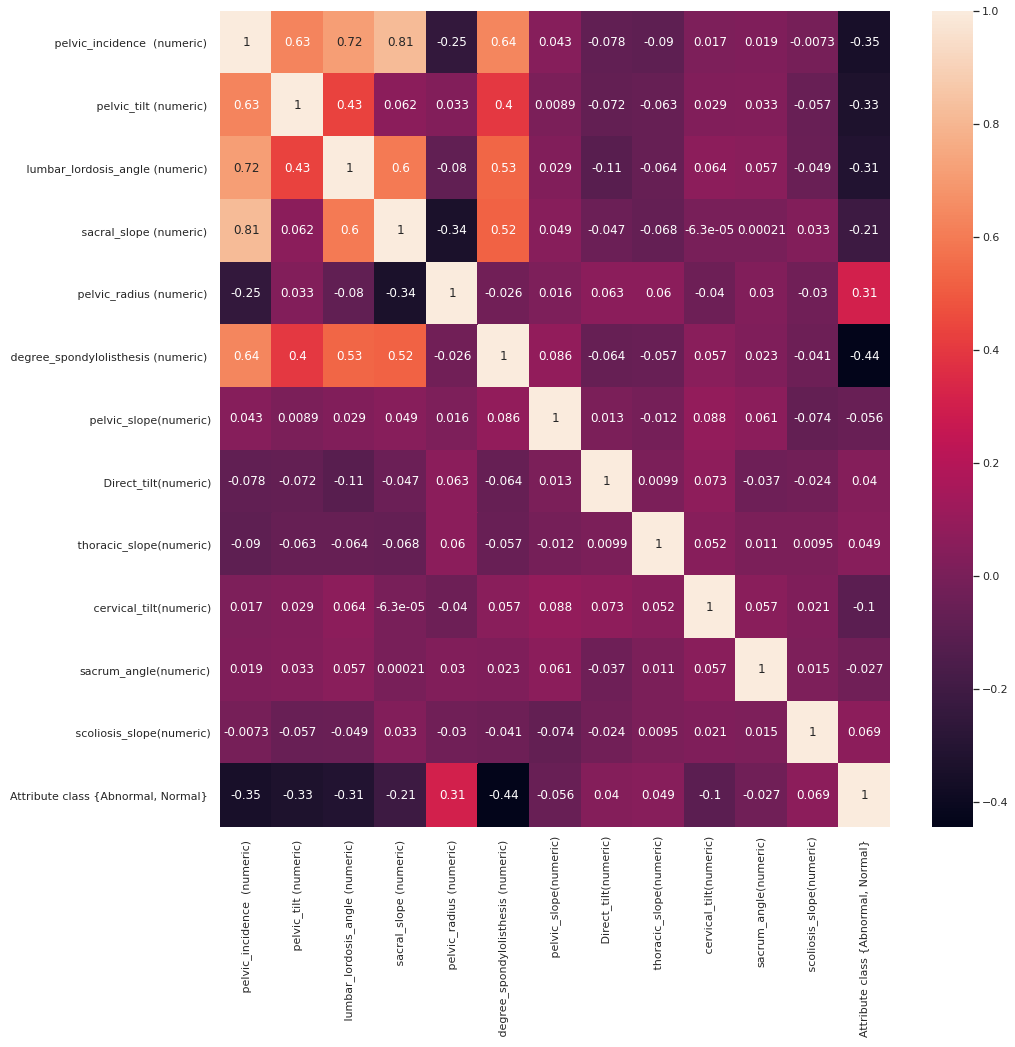

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(back_pain.corr(), annot = True);

In [ ]:
X, y = back_pain.iloc[:, :-1], back_pain.iloc[:, -1]

In [ ]:
def make_synthetic_data_smote(X, y, number_of_samples=1000):
    """
    Synthetic data generation.
        
    Inputs
    ------
    original_data: X, y numpy arrays
    number_of_samples: number of synthetic samples to generate
    n_components: number of principal components to use for data synthesis
    
    Returns
    -------
    X_synthetic: NumPy array
    y_synthetic: NumPy array

    """
    
    
    count_label_0 = np.sum(y==0)
    count_label_1 = np.sum(y==1)
    
    n_class_0 = number_of_samples + count_label_0
    n_class_1 = number_of_samples + count_label_1

    X_resampled, y_resampled = SMOTE(
        sampling_strategy = {0:n_class_0, 1:n_class_1}).fit_resample(X, y)

    X_synthetic = X_resampled[len(X):]
    y_synthetic = y_resampled[len(y):]
                                                                   
    return X_synthetic, y_synthetic



In [ ]:
smote_X, smote_y = make_synthetic_data_smote(X, y, 155)

/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:257: UserWarning: After over-sampling, the number of samples (365) in class 0 will be larger than the number of samples in the majority class (class #0 -> 210)
  n_samples_majority))
/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:257: UserWarning: After over-sampling, the number of samples (255) in class 1 will be larger than the number of samples in the majority class (class #0 -> 210)
  n_samples_majority))
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWar

In [ ]:
smote_df = pd.DataFrame(np.hstack([smote_X, smote_y.reshape(-1 ,1)]),\
                        columns=back_pain.columns)

In [ ]:
smote_df.describe()

,pelvic_incidence (numeric),pelvic_tilt (numeric),lumbar_lordosis_angle (numeric),sacral_slope (numeric),pelvic_radius (numeric),degree_spondylolisthesis (numeric),pelvic_slope(numeric),Direct_tilt(numeric),thoracic_slope(numeric),cervical_tilt(numeric),sacrum_angle(numeric),scoliosis_slope(numeric),"Attribute class {Abnormal, Normal}"
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,59.898711,16.248552,51.219477,43.650160,119.468298,21.111165,0.443243,22.101799,13.363425,12.152354,-14.656471,26.850565,0.500000
std,15.097536,8.410436,16.068015,11.249648,10.967281,31.363732,0.242255,7.727884,2.825141,2.403771,11.814897,9.913519,0.500808
min,34.088496,-5.784277,20.432223,19.710283,77.648635,-8.934133,0.017409,7.073671,7.272136,7.101732,-34.653238,7.051621,0.000000
25%,48.316996,10.140453,38.629456,35.161816,113.369598,1.103630,0.238956,15.692019,11.307949,10.316885,-24.324568,18.184199,0.000000
50%,57.603097,15.428381,48.241037,43.935329,120.487938,5.533443,0.433065,23.153234,13.542367,12.197356,-16.088324,27.135226,0.500000
75%,70.561262,20.129286,61.310364,51.154295,125.787426,33.918084,0.641969,28.425969,15.428158,13.838567,-4.105529,35.030509,1.000000
max,96.177266,47.176119,92.885592,75.910617,150.696105,292.602867,0.977003,36.618142,18.881882,16.774507,6.680346,43.534271,1.000000


In [ ]:
def synth_metrics(real_data, synthetic_data):
    '''
    Returns a group of metrics and plots to evaluate synthetic dataset

    Params:
    -------

    actual_data: pd.DataFrame
    The real data from which the synthetic data is derived from

    synthetic_data: pd.DataFrame
    The synthetic data

    Returns:
    --------
    '''
    fig, axes = plt.subplots(1,2, figsize=(20, 10))
    sns.heatmap(real_data.corr(), ax=axes[0], )
    sns.heatmap(synthetic_data.corr(), ax=axes[1])
    avg_diff = (synthetic_data.corr() - real_data.corr())\
        .abs().values.flatten().mean()
    plt.show()
    print(f'Average difference between correlations: {avg_diff:.3f}')
    num_cols = len(real_data.columns)
    fig, axes = plt.subplots((num_cols+1)//2,2, figsize=(num_cols*3, num_cols*3))
    for i, col in enumerate(real_data.columns):
        axes.flatten()[i].boxplot(back_pain[' pelvic_incidence  (numeric) '], positions=[1])
        axes.flatten()[i].boxplot(smote_df[' pelvic_incidence  (numeric) '], positions=[2])
    plt.show()

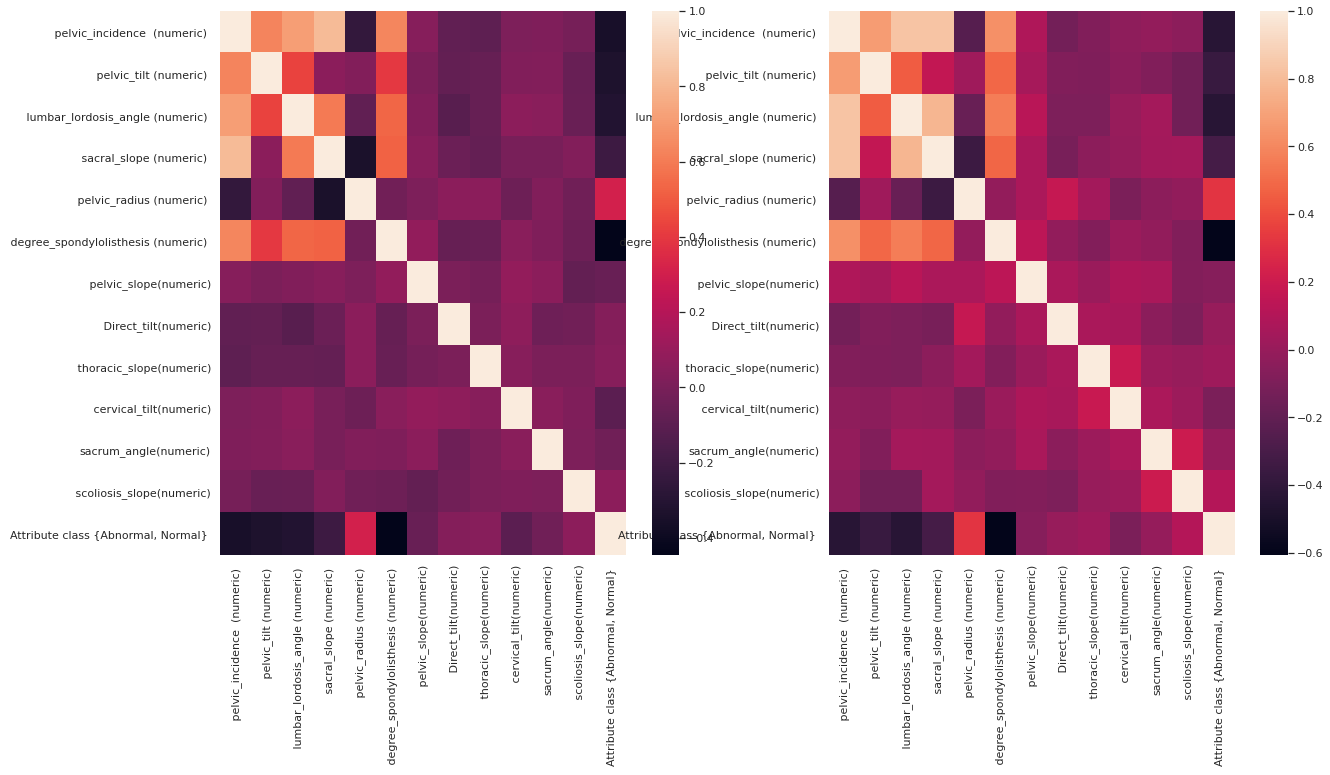

Average difference between correlations: 0.043


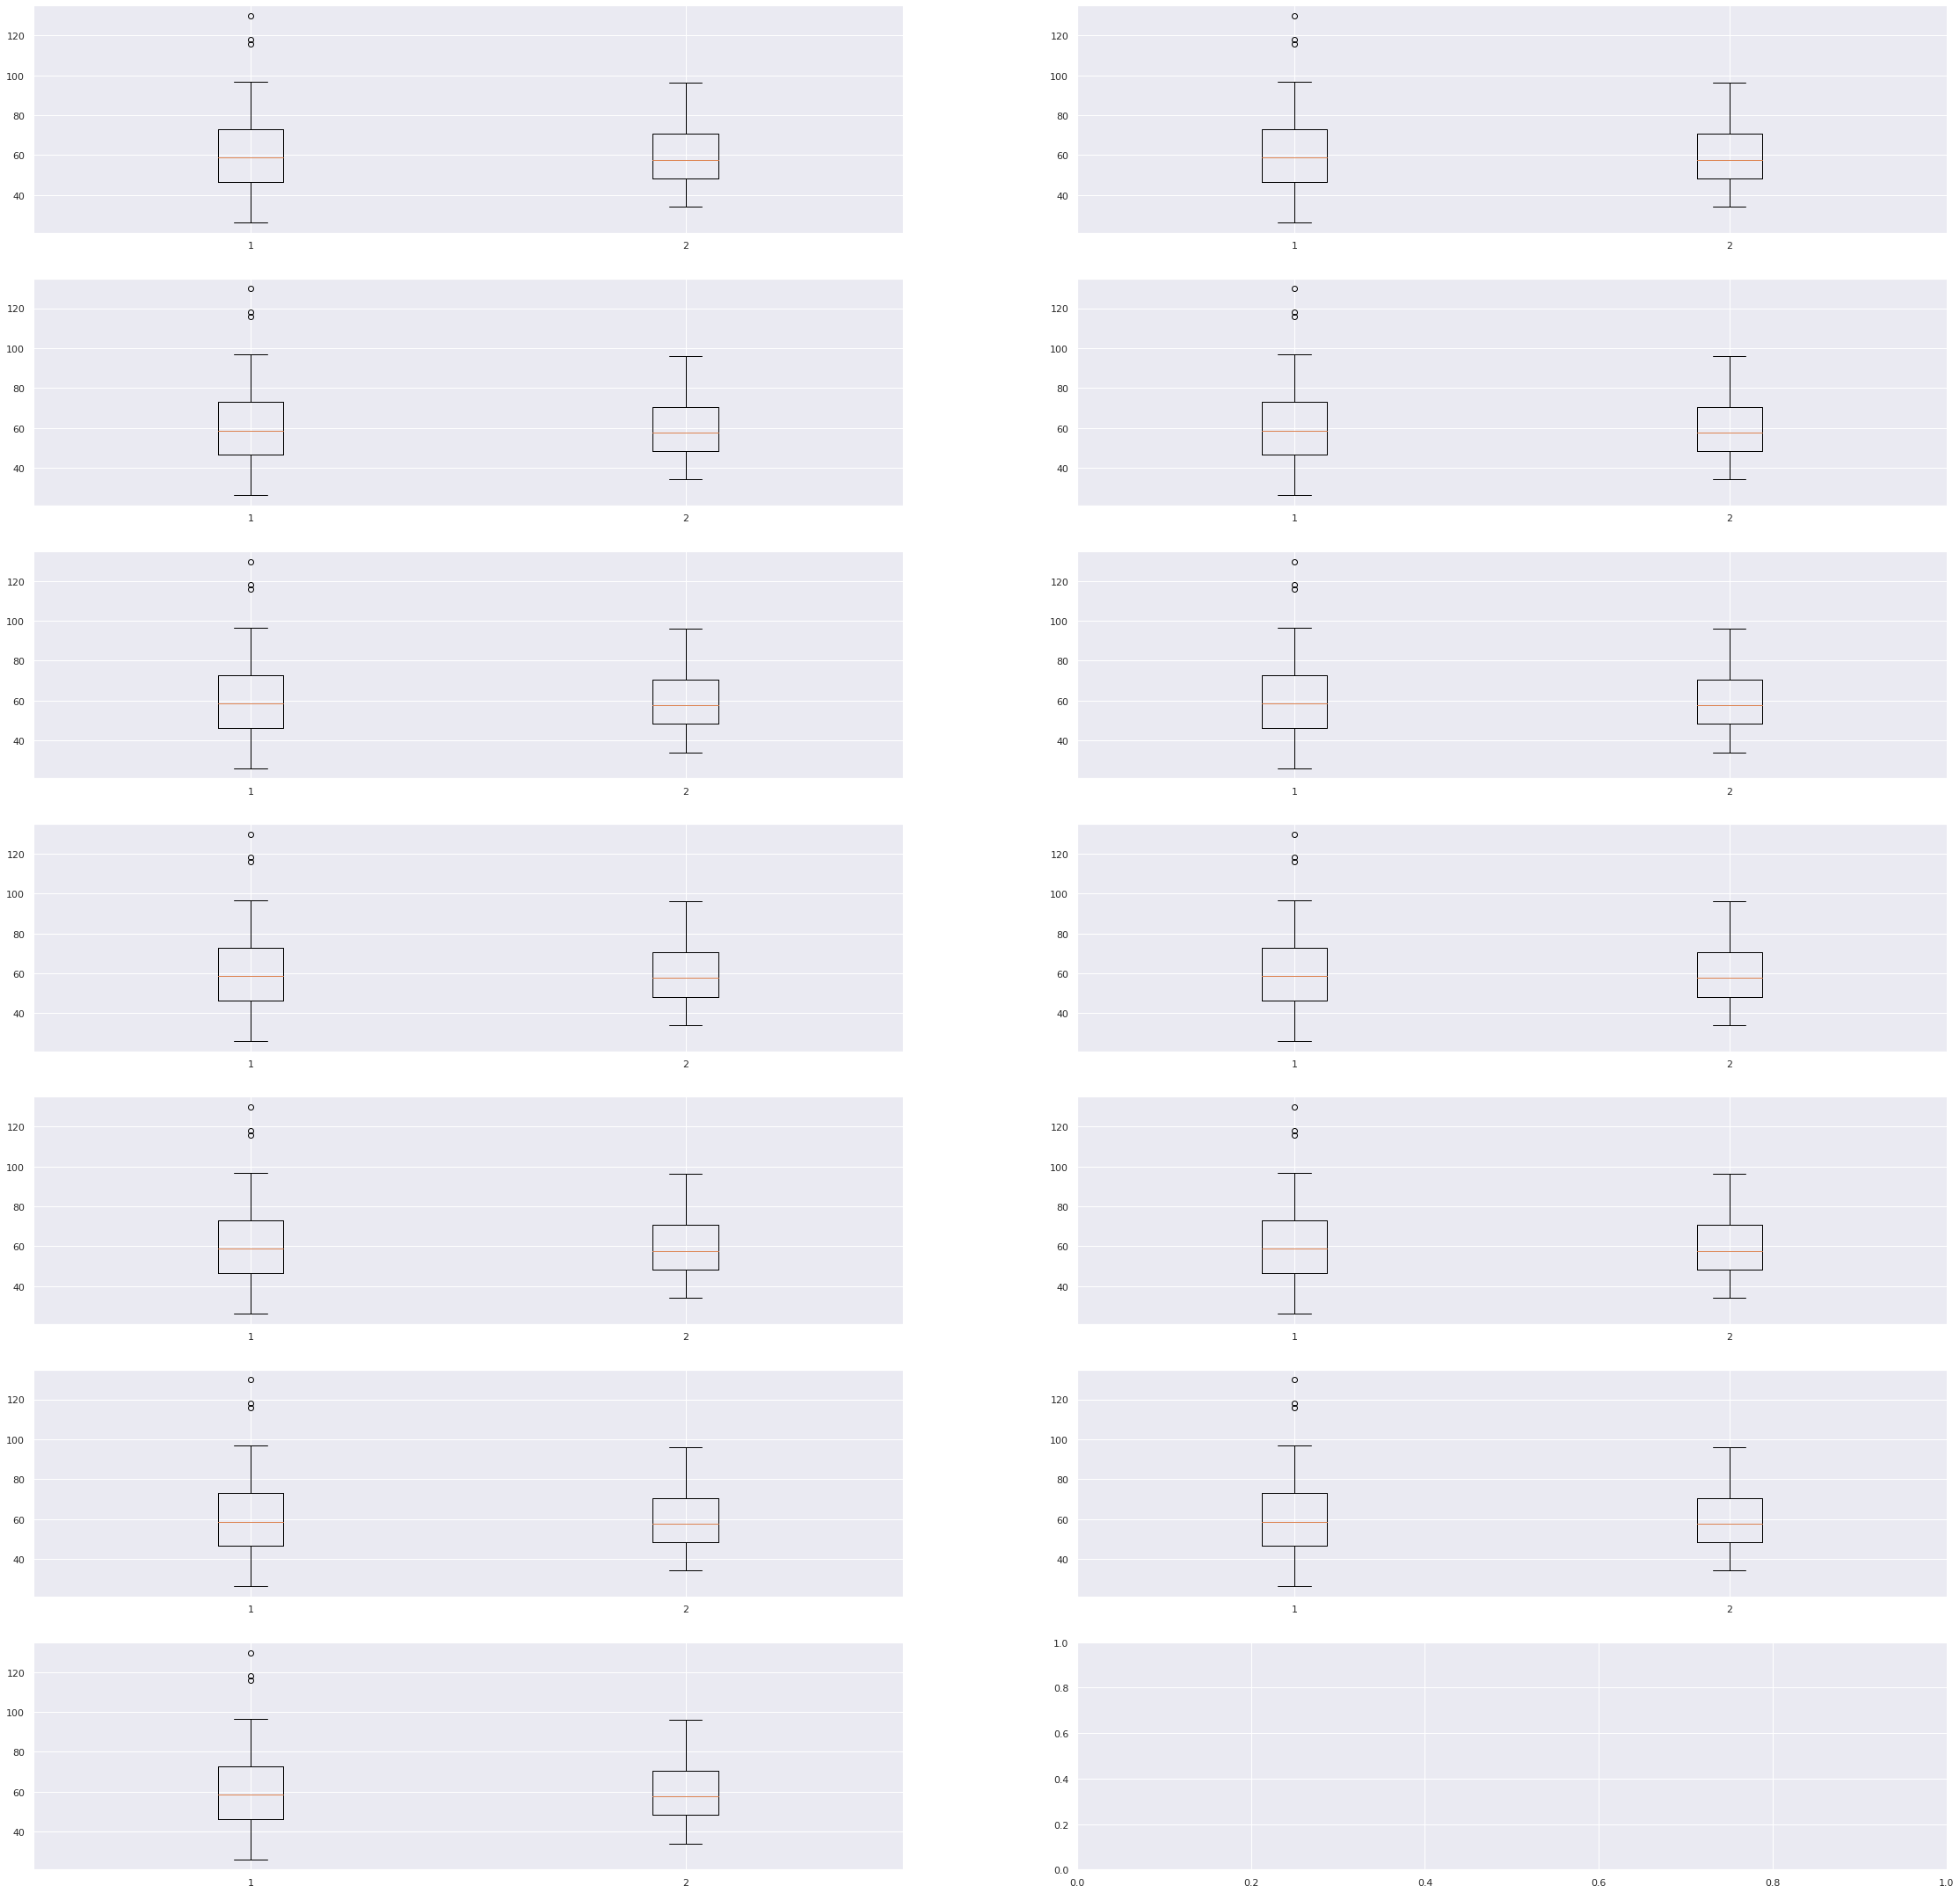

In [ ]:
synth_metrics(back_pain, smote_df)

In [ ]:
url = 'https://raw.githubusercontent.com/jamestgodwin/synthetic_data/main/data/cervical_cancer.csv'
cancer = pd.read_csv(url, na_values='?')
cancer.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,0


In [ ]:
cancer.isna().sum()

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

In [ ]:
cancer = cancer.drop(columns=['STDs: Time since last diagnosis', 'STDs: Time since first diagnosis'])